In [95]:
# import dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Data Cleaning

In [48]:
# load in our data file
temp_df= pd.read_excel("Water_data_years5.xlsx", header=0)

In [49]:
temp_df

,state,statecode,county,countycode,fips,year,tp-totpop,ps-gwpop,ps-swpop,ps-topop,...,to-swsal,to-swtot,to-frtot,to-satot,to-total,to-cufr,to-cusal,to-cuse,to-convy,ls-total
0,AZ,4,Apache County,1,4001.000000,2015,71.474,48.854,0.000,48.854000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
1,AZ,4,Cochise County,3,4003.000000,2015,126.427,102.627,0.000,102.627000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
2,AZ,4,Coconino County,5,4005.000000,2015,139.097,103.701,23.336,127.037000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
3,AZ,4,Gila County,7,4007.000000,2015,53.159,44.404,0.055,44.459000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
4,AZ,4,Graham County,9,4009.000000,2015,37.666,30.656,0.000,30.656000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,WY,56,Weston County,45,56045.000000,2005,6.671,4.555,0.000,4.555000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
1665,WY,56,Weston County,45,56045.000000,2000,6.640,NaN,NaN,5.320000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
1666,WY,56,Weston County,45,22352.630366,1995,6.510,4.840,0.000,4.840000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
1667,WY,56,Weston County,45,22352.630366,1990,0.470,3.980,NaN,199.816678,...,0.000000,7.06000,11.940000,0.260000,12.200000,3.74000,0.000000,3.740000,2.230000,1.894958


In [50]:
# filling in null values
temp_df = temp_df.fillna(value=0)

In [51]:
# checking correlation of columns to tp-totpop - total population of the county in thousands
m = temp_df.corr()["tp-totpop"]

In [52]:
m

statecode    -0.161539
countycode    0.008738
fips         -0.153363
year          0.081215
tp-totpop     1.000000
                ...   
to-cufr       0.047482
to-cusal      0.038683
to-cuse       0.048154
to-convy      0.001537
ls-total      0.022282
Name: tp-totpop, Length: 406, dtype: float64

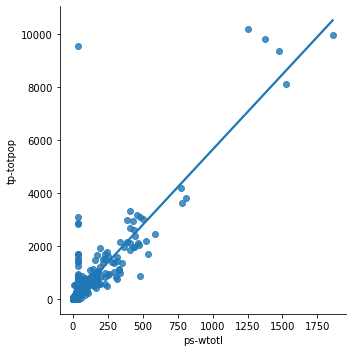

In [53]:
# visualizing how ps-wtotl(Public Supply - Total withdrawals in million gallons/day)
sns.lmplot(x="ps-wtotl", y="tp-totpop", data= temp_df, fit_reg= True, ci= None )

In [79]:
predict_col = "to-wtotl"
drop_col = ["state","statecode","county","countycode", "filename","ps-gwpop","ps-swpop","ps-topop"]
drop_col.append(predict_col)

X=temp_df.drop(columns=drop_col)
y=temp_df[predict_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# split train to take in the data for years before 2010 and test data to years after#
#train = temp_df[temp_df["year"] < 2010].copy()
#test = temp_df[temp_df["year"] >= 2010].copy()

In [80]:
# initialize model
model = LinearRegression()

In [ ]:
# set up X and y for ML
#predictors = ["ps-wtotl" ]
#target = ['tp-totpop']

In [81]:
model.fit(X_train, y_train)

LinearRegression()

In [82]:
# predict using test dataset
predictions = model.predict(X_test)

In [83]:
model.score(X_test, y_test)

1.0

In [67]:
# adding predictions as a column to the test df
#temp_df["predictions"]= predictions

# Changing negative prediction values to 0
#temp_df.loc[temp_df["predictions"] <0,"predictions"] =0

#temp_df

In [84]:
# Fitting Random Forest Regression to the dataet
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators= 100, random_state = 0)



In [85]:
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [86]:
regressor.score(X_test, y_test)

0.9691657678491484